In [1]:
from random import choices, seed
from matplotlib import pyplot as plt
import scipy.stats as stats
import math
import numpy as np

# Unsupervised Learning
Uno de los objetivos del aprendizaje no-supervisado es descubrir como subconjuntos de datos se relacionan. Generar datos es útil porque nos permite *juzgar* el modelo en tanto que conocemos las relaciones entre los datos.

Simularémos el lanzamiento de dos dados, con 1800 lanzamientos.

In [2]:
numberofrolls = 1800
seed(9)
dice1 = choices([1, 2, 3, 4, 5, 6], k=numberofrolls)
dice2 = choices([1, 2, 3, 4, 5, 6], k=numberofrolls)

In [3]:
dicesum = [dice1[i] + dice2[i] for i in range(numberofrolls)]

Veámos la distribución de cada lanzamiento (par de dados).

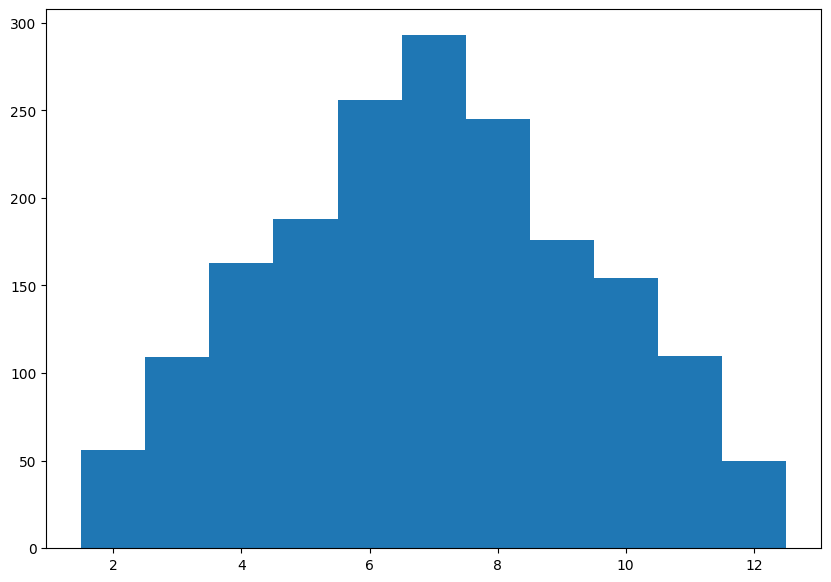

In [4]:
fig, ax = plt.subplots(figsize=(10, 7))
ax.hist(dicesum, bins=[2,3,4,5,6,7,8,9,10,11,12,13], align='left')
plt.show()

La forma del histograma se dice que tiene una distribución normal. Una distribución normal se decribe según la media y la desviación estándar.

In [5]:
def getcenter(allpoints):
    center = np.mean(allpoints)
    stdev = np.sqrt(np.cov(allpoints))
    return (center, stdev)

print(getcenter(dicesum))

(6.9511111111111115, 2.4682190929301053)


Conociendo los valores, podemos graficar la distribución de los lanzamientos.

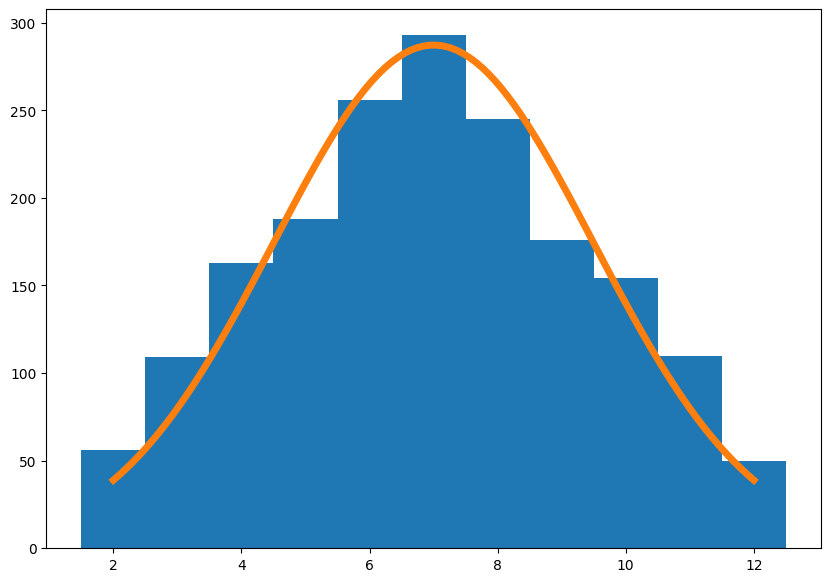

In [6]:
fig, ax = plt.subplots(figsize=(10, 7))
ax.hist(dicesum, bins=range(2, 14), align='left')
mu = 7
sigma = 2.5
x = np.linspace(mu - 2*sigma, mu + 2*sigma, 100)*1
plt.plot(x, stats.norm.pdf(x, mu, sigma)*numberofrolls, linewidth=5)
plt.show()

La forma de Gauss se asemeja al histogramo, por lo tanto podemos utilizarla para calcular una predicción de cada valor:

In [7]:
print(stats.norm.pdf(2, mu, sigma)*numberofrolls)

print(stats.norm.pdf(7, mu, sigma)*numberofrolls)

print(stats.norm.pdf(12, mu, sigma)*numberofrolls)

38.873495889495395
287.23844188903155
38.873495889495395


Calculamos la frecuencia relativa y la multiplicamos por el número de lanzamientos.

### Otro dado
Para avanzar, utilizarémos dos dados de 12 caras, con valores 4, 5, ..., 15.

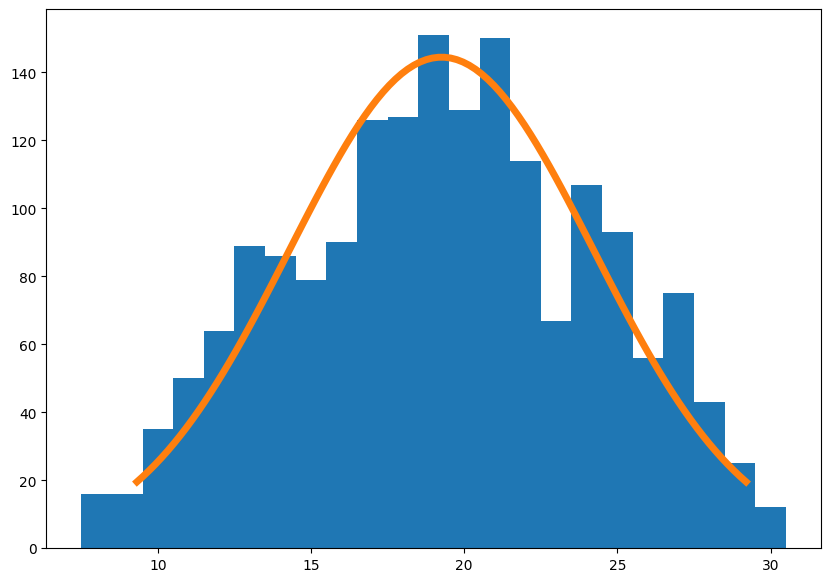

In [8]:
seed(913)
dice1 = choices([4,5,6,7,8,9,10,12,12,13,14,15], k=numberofrolls)
dice2 = choices([4,5,6,7,8,9,10,12,12,13,14,15], k=numberofrolls)
dicesum12 = [dice1[i] + dice2[i] for i in range(numberofrolls)]
fig, ax = plt.subplots(figsize=(10, 7))
ax.hist(dicesum12, bins=range(8, 32), align='left')
mu = np.mean(dicesum12)
sigma = np.std(dicesum12)
x = np.linspace(mu - 2*sigma, mu + 2*sigma, 100)*1
plt.plot(x, stats.norm.pdf(x, mu, sigma)*numberofrolls, linewidth=5)
plt.show()

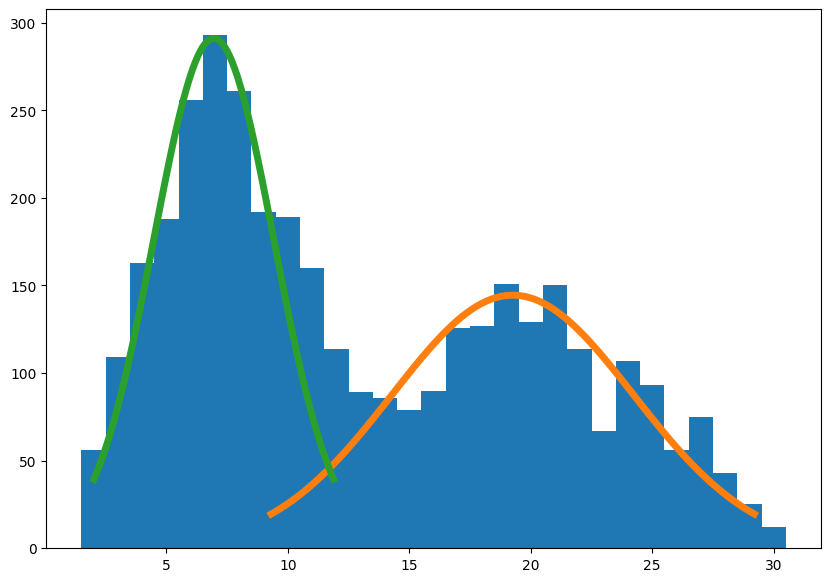

In [9]:
dicesumboth = dicesum + dicesum12 # Concatenacion de los resultados de ambos dados
fig, ax = plt.subplots(figsize=(10, 7))
ax.hist(dicesumboth, bins=range(2, 32), align='left')
mu = np.mean(dicesum12)
sigma = np.std(dicesum12)
x = np.linspace(mu - 2*sigma, mu + 2*sigma, 100)*1
plt.plot(x, stats.norm.pdf(x, mu, sigma)*numberofrolls, linewidth=5)
mu = np.mean(dicesum)
sigma = np.std(dicesum)
x = np.linspace(mu - 2*sigma, mu + 2*sigma, 100)*1
plt.plot(x, stats.norm.pdf(x, mu, sigma)*numberofrolls, linewidth=5)
plt.show()

## Observaciones con clustering


In [10]:
seed = 494
randomselection = choices(dicesumboth, k=1)
randomselection

[28]

¿Cómo es la distribución de los resultados que suman 8? Las distribuciones sugieren que es más probable que un resultado de 8 provenga del primer par de dados.

In [11]:
print(stats.norm.pdf(8, np.mean(dicesum), np.std(dicesum))*numberofrolls)
print(stats.norm.pdf(8, np.mean(dicesum12), np.std(dicesum12))*numberofrolls)

265.8785549397301
11.112846736837785


¿Y para un resultado de 12? Es más probable que provenga del segundo par de dados.

In [12]:
print(stats.norm.pdf(12, np.mean(dicesum), np.std(dicesum))*numberofrolls)
print(stats.norm.pdf(12, np.mean(dicesum12), np.std(dicesum12))*numberofrolls)

35.87586208537935
49.745777063968276


Definimos una función para hacer clustering de nuestras observaciones de nuestros dados:

In [30]:
from scipy.stats import multivariate_normal
def classify(allpts, allmns, allvar):
    vars=[]
    for n in range(len(allmns)):
        vars.append(multivariate_normal(mean=allmns[n], cov=allvar[n]))
    classification = []
    for point in allpts:
        this_classification = -1
        this_pdf = 0
        for n in range(len(allmns)):
            if vars[n].pdf(point) > this_pdf:
                this_pdf = vars[n].pdf(point)
                this_classification = n + 1
        classification.append(this_classification)
    return classification

Escogemos algunos puntos de ejemplo:

In [14]:
allpoints = [2, 8, 12, 15, 25]
allmeans = [7, 19]
allvar = [np.cov(dicesum), np.cov(dicesum12)]

Vemos la clasificación:

In [15]:
classify(allpoints, allmeans, allvar)

[1, 1, 2, 2, 2]

**What we’ve just done is take a list of very different dice rolls and classify them into two distinct groups**. You might want to call this classification orgrouping, but in the world of machine learning, it’s called clustering. If you look at Figure 7-6, you can begin to see why. Dice rolls from the 6-sided dice appear to cluster around their most common value, 7, while dice rollsfrom the 12-sided dice appear to cluster around their most common value,19. **They form little mountains of observations, or groups, that we’re goingto call clusters regardless of their shape or size.**

# Aplicaciones en los negocios
En lugar de pensar en dados, podemos pensar en el monto de gasto de clientes, el histograma demostraría la frecuencia de esos gastos. Las técnicas de clustering nos ayudan a *segmentar* los datos en grupos, que vendrían a ser los tipos de clientes. 

¿Clasificamos a los clientes como clientes de alta gasto, de baja gasto, de media gasto o de bajo gasto?

# E-M Clustering

In [16]:
import ast 
import requests 
link = "https://bradfordtuckfield.com/emdata.txt" 
f = requests.get(link) 
allpoints = ast.literal_eval(f.text)

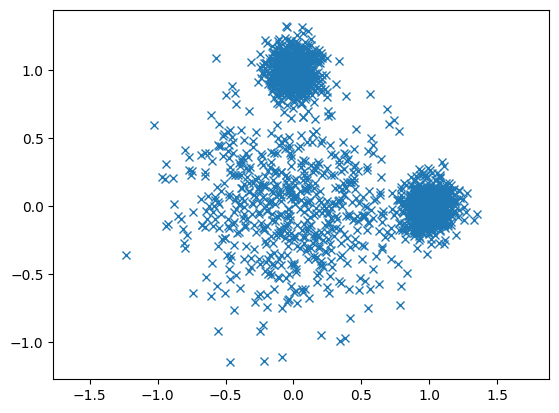

In [17]:
allxs=[point[0] for point in allpoints] 
allys=[point[1] for point in allpoints] 
plt.plot(allxs, allys, 'x') 
plt.axis('equal') 
plt.show()

    Esta colección de datos bivariados pueden interpretarse libremente.

Las etapas para el análiss de EM son:
* Guessing
* Expectation
* Maximization
* Convergence

### Guessing
En la etapa gueesing hacemos suposiciones iniciales de los *centros* de cada cluster.

In [38]:
#initial guesses 
mean1=[-1,0] 
mean2=[0.5,-1] 
mean3=[0.5,0.5] 
allmeans=[mean1,mean2,mean3] 
cov1=[[1,0],[0,1]] 
cov2=[[1,0],[0,1]] 
cov3=[[1,0],[0,1]] 
allvar=[cov1,cov2,cov3]

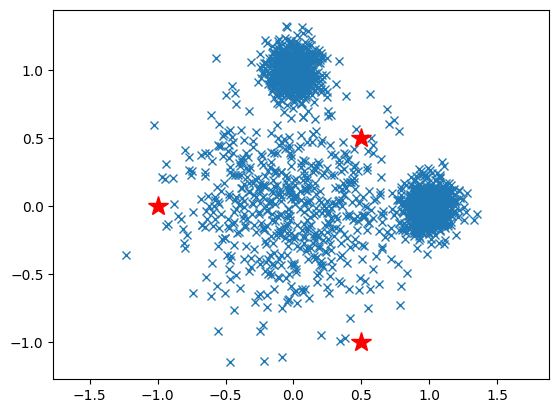

In [40]:
plt.plot(allxs, allys, 'x') 
plt.plot(mean1[0],mean1[1],'r*', markersize=15) 
plt.plot(mean2[0],mean2[1],'r*', markersize=15) 
plt.plot(mean3[0],mean3[1],'r*', markersize=15) 
plt.axis('equal') 
plt.show()

### Expectation
Para la etapa expectation utilizamos la función definida previamente `classify`

In [42]:
 theclass=classify(allpoints,allmeans,allvar)

In [34]:
def makeplot(allpoints, theclass, allmeans):
    thecolors = ['black']*len(allpoints)
    for idx in range(len(thecolors)):
        if theclass[idx] == 2:
            thecolors[idx] = 'green'
        if theclass[idx] == 3:
            thecolors[idx] = 'yellow'
    allxs = [point[0] for point in allpoints]
    allys = [point[1] for point in allpoints]
    for i in range(len(allpoints)):
        plt.scatter(allxs[i], allys[i], color=thecolors[i])
    for i in range(len(allmeans)):
        plt.plot(allmeans[i][0], allmeans[i][1], 'b*', markersize=15)
    plt.axis('equal')
    plt.show()

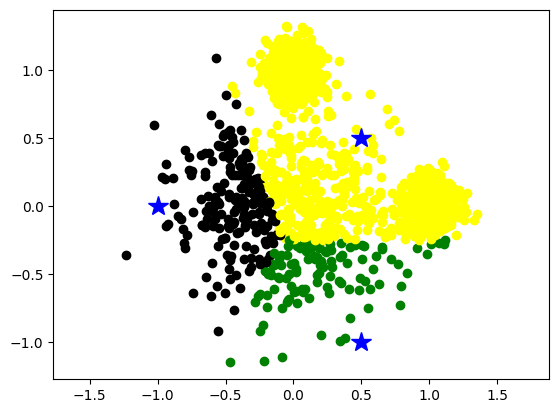

In [22]:
makeplot(allpoints, theclass, allmeans)

### Maximization

In [66]:
def getcenters(allpoints, theclass, k):
    centers=[]
    thevars=[]
    for n in range(k):
        pointsn = [allpoints[i] for i in range(0,len(allpoints)) if theclass[i]==(n+1)]
        xpointsn = [points[0] for points in pointsn]
        ypointsn = [points[1] for points in pointsn]
        xcenter = np.mean(xpointsn)
        ycenter = np.mean(ypointsn)
        centers.append([xcenter, ycenter])
        thevars.append(np.cov(xpointsn, ypointsn))
    return centers, thevars

In [68]:
 allmeans,allvar=getcenters(allpoints,theclass,3)

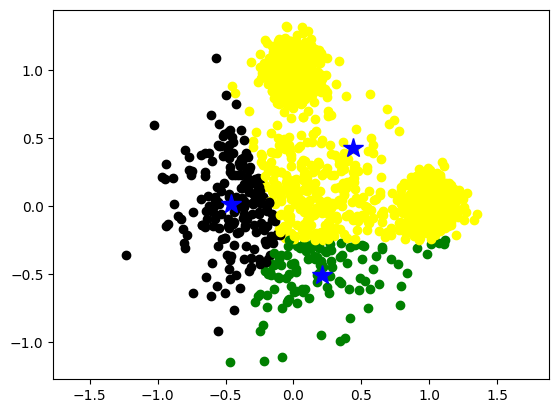

In [70]:
makeplot(allpoints,theclass,allmeans)

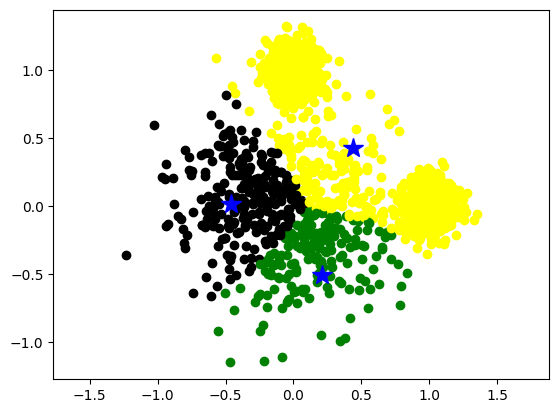

In [74]:
makeplot(allpoints,theclass,allmeans)

### Convergence

In [78]:
for n in range(0,100): 
    theclass=classify(allpoints,allmeans,allvar) 
    allmeans,allvar=getcenters(allpoints,theclass,3)

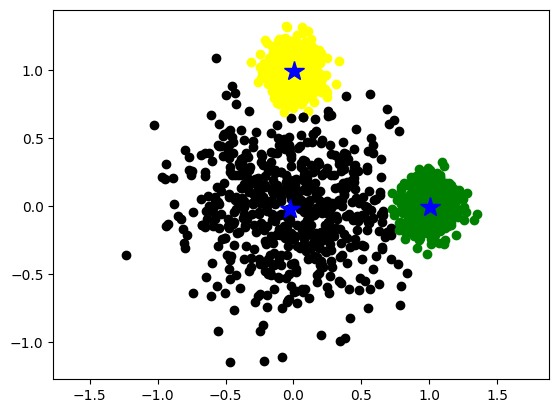

In [80]:
makeplot(allpoints,theclass,allmeans)

## K-M Clustering

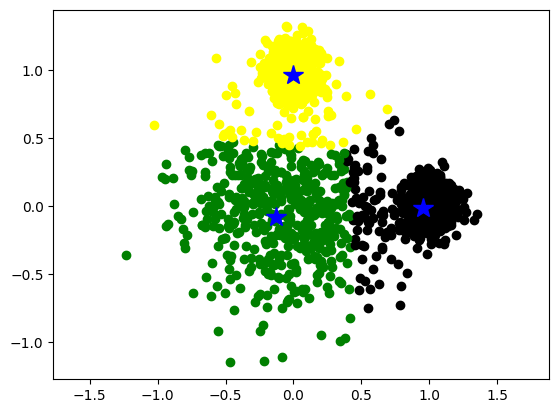

In [84]:
from sklearn.cluster import KMeans 
kmeans = KMeans(init="random", n_clusters=3, n_init=10, max_iter=300, random_state=42) 
kmeans.fit(allpoints) 
newclass=[label+1 for label in kmeans.labels_] 
makeplot(allpoints,newclass,kmeans.cluster_centers_)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=25415bd8-24a1-4217-9df7-438e1e208889' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>